<a href="https://colab.research.google.com/github/SidtheKidx/tone-classification-CadenceIQ/blob/main/tone-classification-main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tone Classification-CadenceIQ using BERT Transformers


## Dataset :


*   [Enron Dataset](https://www.kaggle.com/wcukierski/enron-email-dataset)
*   [Emotions Dataset](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=val.txt)



In [1]:
import json
!pip install --upgrade "ibm-watson>=5.1.0"

from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import pandas as pd 
import numpy as np
import os, sys, email, re

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

Requirement already up-to-date: ibm-watson>=5.1.0 in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [2]:
'''emails = pd.read_csv('emails.csv')'''

"emails = pd.read_csv('emails.csv')"

In [3]:
'''emails.head()'''

'emails.head()'

In [4]:
'''emails.shape'''

'emails.shape'

In [5]:
'''emails.message[1]'''

'emails.message[1]'

In [6]:
'''emails.info()'''

'emails.info()'

In [7]:
'''emails.describe()'''

'emails.describe()'

## Data Preprocessing

In [8]:
#To get the content from email objects
'''
def get_text_from_email(msg):
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append(part.get_payload())
    return ''.join(parts) 
    '''

"\ndef get_text_from_email(msg):\n    parts = []\n    for part in msg.walk():\n        if part.get_content_type() == 'text/plain':\n            parts.append(part.get_payload())\n    return ''.join(parts) \n    "

In [9]:
#To separate multiple email addresses
'''
def split_email_addresses(line):
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    
    else:
        addrs = None
    return addrs '''

"\ndef split_email_addresses(line):\n    if line:\n        addrs = line.split(',')\n        addrs = frozenset(map(lambda x: x.strip(), addrs))\n    \n    else:\n        addrs = None\n    return addrs "

In [10]:
# Parse the emails into a list email objects
'''
messages = list(map(email.message_from_string, emails['message']))
emails.drop('message', axis=1, inplace=True)

# Get fields from parsed email objects
keys = messages[0].keys()

for key in keys:
    emails[key] = [doc[key] for doc in messages]
    
# Parse content from emails
emails['content'] = list(map(get_text_from_email, messages))

# Split multiple email addresses
emails['From'] = emails['From'].map(split_email_addresses)
emails['To'] = emails['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails['user'] = emails['file'].map(lambda x:x.split('/')[0])
del messages

emails.head(10) '''

"\nmessages = list(map(email.message_from_string, emails['message']))\nemails.drop('message', axis=1, inplace=True)\n\n# Get fields from parsed email objects\nkeys = messages[0].keys()\n\nfor key in keys:\n    emails[key] = [doc[key] for doc in messages]\n    \n# Parse content from emails\nemails['content'] = list(map(get_text_from_email, messages))\n\n# Split multiple email addresses\nemails['From'] = emails['From'].map(split_email_addresses)\nemails['To'] = emails['To'].map(split_email_addresses)\n\n# Extract the root of 'file' as 'user'\nemails['user'] = emails['file'].map(lambda x:x.split('/')[0])\ndel messages\n\nemails.head(10) "

In [11]:
# Set index and drop columns with two few values
'''
emails = emails.set_index('Message-ID')\
    .drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
emails['Date'] = pd.to_datetime(emails['Date'], infer_datetime_format=True)
emails.dtypes '''

"\nemails = emails.set_index('Message-ID')    .drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)\n# Parse datetime\nemails['Date'] = pd.to_datetime(emails['Date'], infer_datetime_format=True)\nemails.dtypes "

In [12]:
#Don't need to clean dataset as IBM watson analyser will do it. Might have to do during MODELLING.

'''
def clean(text):
    stop = set(stopwords.words('english'))
    stop.update(("to", "cc", "subject", "http", "from", "sent"))
    exclude = set(string.punctuation)
    
    #lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.
    
'''

'\ndef clean(text):\n    stop = set(stopwords.words(\'english\'))\n    stop.update(("to", "cc", "subject", "http", "from", "sent"))\n    exclude = set(string.punctuation)\n    \n    #lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.\n    \n'

In [13]:
''' emails['content'][10] '''

" emails['content'][10] "

In [14]:
''' tone_df = emails[['content']][:2000] '''

" tone_df = emails[['content']][:2000] "

In [15]:
#new dataset for message content and its tone
#tone_df.to_csv(r'/Users/siddharthsingh/CadenceIQ/tone_Analyzer/tone-content-data.csv')
#tone_df = pd.read_csv('tone-content-data.csv')

In [16]:
'''tone_df.head()'''

'tone_df.head()'

In [17]:
'''tone_df.shape'''

'tone_df.shape'

In [18]:
#IBM watson tone analyser API endpoint 
'''
authenticator = IAMAuthenticator('7UkBO29yBlRAuDZzA5s8Nl-IbmlR3mK1yINRazApqitf')
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/cd914da7-f09f-4298-862d-d4c6005ac8b3')
'''

"\nauthenticator = IAMAuthenticator('7UkBO29yBlRAuDZzA5s8Nl-IbmlR3mK1yINRazApqitf')\ntone_analyzer = ToneAnalyzerV3(\n    version='2017-09-21',\n    authenticator=authenticator\n)\ntone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/cd914da7-f09f-4298-862d-d4c6005ac8b3')\n"

In [19]:
#Converting column to list. We could also use df['column'].tolist() OR list(tone_df['content'])
'''
text = list(tone_df['content'])
text '''

"\ntext = list(tone_df['content'])\ntext "

In [20]:
'''c = 0
list_tones = [] '''

'c = 0\nlist_tones = [] '

In [21]:
'''
for i in text:
    print(i)
    tone_analysis = tone_analyzer.tone(
        {'text': i},
        content_type='application/json'
    ).get_result()
    
    list_tones.append(json.dumps(tone_analysis, indent=2))
    c+=1
    
tone_df = tone_df.assign(tones = list_tones)
#print(json.dumps(tone_analysis, indent=2))     '''

"\nfor i in text:\n    print(i)\n    tone_analysis = tone_analyzer.tone(\n        {'text': i},\n        content_type='application/json'\n    ).get_result()\n    \n    list_tones.append(json.dumps(tone_analysis, indent=2))\n    c+=1\n    \ntone_df = tone_df.assign(tones = list_tones)\n#print(json.dumps(tone_analysis, indent=2))     "

In [22]:
'''tone_df.head()'''

'tone_df.head()'

In [23]:
'''tone_df.to_csv(r'/Users/siddharthsingh/CadenceIQ/tone_Analyzer/tone-content-data-og.csv')'''

"tone_df.to_csv(r'/Users/siddharthsingh/CadenceIQ/tone_Analyzer/tone-content-data-og.csv')"

In [24]:
#print(json.dumps(tone_analysis, indent=2)) 

In [25]:
#print(tone_analysis['sentences_tone'][1]['tones'][0])

## Accessing JSON data to visualize distribution of Enron dataset tones

In [26]:
og_tone = pd.read_csv('https://raw.githubusercontent.com/SidtheKidx/tone-classification-CadenceIQ/main/tone-content-data-og.csv?token=AJVH2HYIV7IQOQYGTXJ3XI3AUPGRE')

In [27]:
og_tone['tones'][5]

'{\n  "document_tone": {\n    "tones": [\n      {\n        "score": 0.883404,\n        "tone_id": "analytical",\n        "tone_name": "Analytical"\n      },\n      {\n        "score": 0.994704,\n        "tone_id": "tentative",\n        "tone_name": "Tentative"\n      }\n    ]\n  },\n  "sentences_tone": [\n    {\n      "sentence_id": 0,\n      "text": "Greg,",\n      "tones": []\n    },\n    {\n      "sentence_id": 1,\n      "text": "",\n      "tones": []\n    },\n    {\n      "sentence_id": 2,\n      "text": " How about either next Tuesday or Thursday?",\n      "tones": [\n        {\n          "score": 0.801827,\n          "tone_id": "analytical",\n          "tone_name": "Analytical"\n        },\n        {\n          "score": 0.974201,\n          "tone_id": "tentative",\n          "tone_name": "Tentative"\n        }\n      ]\n    },\n    {\n      "sentence_id": 3,\n      "text": "Phillip",\n      "tones": []\n    }\n  ]\n}'

In [28]:
import json

In [29]:
#To replce \\n with \n. Helps in visaualising JSON data.
og_tone['tones'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [30]:
#Any content with just ONE sentence does NOT have a sentence-id in JSON data.
og_tone.head(10)

,Unnamed: 0,Message-ID,content,tones
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast\n\n,"{ ""document_tone"": { ""tones"": [ { ..."
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,"{ ""document_tone"": { ""tones"": [ { ..."
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,"{ ""document_tone"": { ""tones"": [ { ..."
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...","{ ""document_tone"": { ""tones"": [ { ..."
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,"{ ""document_tone"": { ""tones"": [] }}"
5,5,<30965995.1075863688265.JavaMail.evans@thyme>,"Greg,\n\n How about either next Tuesday or Thu...","{ ""document_tone"": { ""tones"": [ { ..."
6,6,<16254169.1075863688286.JavaMail.evans@thyme>,Please cc the following distribution list with...,"{ ""document_tone"": { ""tones"": [] }, ""sen..."
7,7,<17189699.1075863688308.JavaMail.evans@thyme>,any morning between 10 and 11:30,"{ ""document_tone"": { ""tones"": [ { ..."
8,8,<20641191.1075855687472.JavaMail.evans@thyme>,1. login: pallen pw: ke9davis\n\n I don't thi...,"{ ""document_tone"": { ""tones"": [ { ..."
9,9,<30795301.1075855687494.JavaMail.evans@thyme>,---------------------- Forwarded by Phillip K ...,"{ ""document_tone"": { ""tones"": [ { ..."


In [31]:
og_tone['tones'][5]

'{  "document_tone": {    "tones": [      {        "score": 0.883404,        "tone_id": "analytical",        "tone_name": "Analytical"      },      {        "score": 0.994704,        "tone_id": "tentative",        "tone_name": "Tentative"      }    ]  },  "sentences_tone": [    {      "sentence_id": 0,      "text": "Greg,",      "tones": []    },    {      "sentence_id": 1,      "text": "",      "tones": []    },    {      "sentence_id": 2,      "text": " How about either next Tuesday or Thursday?",      "tones": [        {          "score": 0.801827,          "tone_id": "analytical",          "tone_name": "Analytical"        },        {          "score": 0.974201,          "tone_id": "tentative",          "tone_name": "Tentative"        }      ]    },    {      "sentence_id": 3,      "text": "Phillip",      "tones": []    }  ]}'

In [33]:
json_data = pd.read_json('https://raw.githubusercontent.com/SidtheKidx/tone-classification-CadenceIQ/main/ibm-tones.json?token=AJVH2H7DUOT4GHHA25USOGLAUPGXA', lines = True)

In [34]:
counter_dict = {
    
        'anger' : {
            'score' : 0,
            'count' : 0
        }, 
        'analytical' : {
            'score' : 0,
            'count' : 0
        },
        'fear' :{
            'score' : 0,
            'count' : 0
        },
        'joy' : {
            'score' : 0,
            'count' : 0
        },
        'sadness' : {
            'score' : 0,
            'count' : 0
        },
        'confident' : {
            'score' : 0,
            'count' : 0
        },
        'tentative' : {
            'score' : 0,
            'count' : 0
        }
}

for json_data in og_tone['tones']:
    data_dict = json.loads(str(json_data))
    
    for document_tones in data_dict['document_tone']['tones']:
        counter_dict[document_tones['tone_id']]['count']+=1
        counter_dict[document_tones['tone_id']]['score']= (counter_dict[document_tones['tone_id']]['score'] + document_tones['score'])/2

print(counter_dict)

{'anger': {'score': 0.5338457812499999, 'count': 5}, 'analytical': {'score': 0.8817075917647587, 'count': 857}, 'fear': {'score': 0.6245237031249999, 'count': 9}, 'joy': {'score': 0.627133168507743, 'count': 406}, 'sadness': {'score': 0.5510907781760023, 'count': 164}, 'confident': {'score': 0.8262343132838654, 'count': 137}, 'tentative': {'score': 0.7295375807820894, 'count': 701}}


### Visualizating Enron tones as a bar plot


In [35]:
#The dictionary of tones, count & score converted to DATAFRAME for visualization
vis_df = pd.DataFrame.from_dict(counter_dict)
vis_ax = vis_df.transpose()
vis_ax.reset_index(level=0, inplace=True)
print(vis_ax)
vis_ax['count'].sum()

        index     score  count
0       anger  0.533846    5.0
1  analytical  0.881708  857.0
2        fear  0.624524    9.0
3         joy  0.627133  406.0
4     sadness  0.551091  164.0
5   confident  0.826234  137.0
6   tentative  0.729538  701.0


2279.0

### Distribution of tones

Text(0.5, 1.0, 'Enron tone distribution')

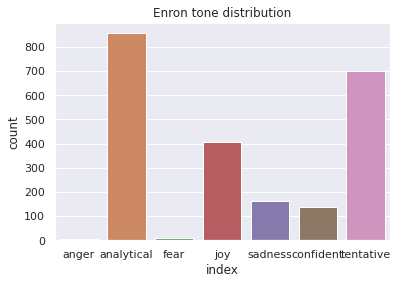

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.barplot(x = vis_ax['index'], y = vis_ax['count'], data=vis_ax).set_title('Enron tone distribution')

In [37]:
# Indent keyword while dumping the
# data decides to what level 
# spaces the user wants.
#print(json.dumps(data_dict, indent = 1))

#print(data_dict['sentences_tone'])

# Difference in the spaces 
# near the brackets can be seen
#print(json.dumps(data_dict, indent = 3))

In [38]:
#df_train = pd.read_csv("/Users/siddharthsingh/CadenceIQ/tone_Analyzer/emotions-dataset/train.txt", delimiter=';', header=None, names=['sentence','label'])
#df_test = pd.read_csv("/Users/siddharthsingh/CadenceIQ/tone_Analyzer/emotions-dataset/test.txt", delimiter=';', header=None, names=['sentence','label'])
#df_val = pd.read_csv("/Users/siddharthsingh/CadenceIQ/tone_Analyzer/emotions-dataset/val.txt", delimiter=';', header=None, names=['sentence','label'])

In [39]:
#emo_df = pd.concat([df_train,df_test,df_val])

In [40]:
#emo_df['label'].unique()

In [41]:
#emo_df.head(10)

In [42]:
#emo_df.describe()

In [43]:
'''
count = emo_df['label'].value_counts()
print(count)
count.sum()
'''

"\ncount = emo_df['label'].value_counts()\nprint(count)\ncount.sum()\n"

In [44]:
#emo_df1 = emo_df[:1500].copy()

In [45]:
#emo_df1.shape

In [46]:
#emo_df1.head()

In [47]:
#emo_df1.describe()

In [48]:
'''
count_df1 = emo_df1['label'].value_counts()
print(count_df1)
count_df1.sum()
'''

"\ncount_df1 = emo_df1['label'].value_counts()\nprint(count_df1)\ncount_df1.sum()\n"

In [49]:
#sns.countplot(x=count_df1, data = emo_df1['label'])

## Accessing JSON data to visualize distribution of Emotions dataset tones

In [50]:
#IBM watson tone analyser API endpoint 
'''
authenticator = IAMAuthenticator('SwdiI5vCKkgeyJuYIEwhOkajctEnxTR-F7OYZ4pvF9GE')
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/3e193de0-bcaa-47c0-8898-4c68a520ce78')
'''

"\nauthenticator = IAMAuthenticator('SwdiI5vCKkgeyJuYIEwhOkajctEnxTR-F7OYZ4pvF9GE')\ntone_analyzer = ToneAnalyzerV3(\n    version='2017-09-21',\n    authenticator=authenticator\n)\ntone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/3e193de0-bcaa-47c0-8898-4c68a520ce78')\n"

In [51]:
#Converting column to list. 
'''
text = list(emo_df1['sentence'])
text
''' 

"\ntext = list(emo_df1['sentence'])\ntext\n"

In [52]:
'''
c = 0
list_tones = []


for i in text:
    print(i)
    tone_analysis = tone_analyzer.tone(
        {'text': i},
        content_type='application/json'
    ).get_result()

    list_tones.append(json.dumps(tone_analysis, indent=2))
    c+=1

emo_df1 = emo_df1.assign(tones = list_tones)
#print(json.dumps(tone_analysis, indent=2)) 
'''

"\nc = 0\nlist_tones = []\n\n\nfor i in text:\n    print(i)\n    tone_analysis = tone_analyzer.tone(\n        {'text': i},\n        content_type='application/json'\n    ).get_result()\n\n    list_tones.append(json.dumps(tone_analysis, indent=2))\n    c+=1\n\nemo_df1 = emo_df1.assign(tones = list_tones)\n#print(json.dumps(tone_analysis, indent=2)) \n"

In [53]:
#emo_df1.head(10)

In [54]:
#emo_df1['sentence'][9]

In [55]:
#emo_df1['tones'][7]

In [56]:
#emo_df1['tones'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [57]:
#emo_df1['tones'][7]

In [59]:
emo_df1 = pd.read_csv('https://raw.githubusercontent.com/SidtheKidx/tone-classification-CadenceIQ/main/Emotions-tone-data-og.csv?token=AJVH2H5UPGH7S3G6U7QCX23AUPG2C')

In [61]:
json_df1 = pd.read_json('https://raw.githubusercontent.com/SidtheKidx/tone-classification-CadenceIQ/main/emotions-tones.json?token=AJVH2HZ43QZOIEERHYLU3FTAUPG5K', lines=True)

In [62]:
counter_dict_df1 = {
    
        'anger' : {
            'score' : 0,
            'count' : 0
        }, 
        'analytical' : {
            'score' : 0,
            'count' : 0
        },
        'fear' :{
            'score' : 0,
            'count' : 0
        },
        'joy' : {
            'score' : 0,
            'count' : 0
        },
        'sadness' : {
            'score' : 0,
            'count' : 0
        },
        'confident' : {
            'score' : 0,
            'count' : 0
        },
        'tentative' : {
            'score' : 0,
            'count' : 0
        }
}

for json_df1 in emo_df1['tones']:
    data_dict_df1 = json.loads(str(json_df1))
    
    for document_tones_df1 in data_dict_df1['document_tone']['tones']:
        counter_dict_df1[document_tones_df1['tone_id']]['count']+=1
        counter_dict_df1[document_tones_df1['tone_id']]['score']= (counter_dict_df1[document_tones_df1['tone_id']]['score'] + document_tones_df1['score'])/2

print(counter_dict_df1)

{'anger': {'score': 0.8169358478850066, 'count': 65}, 'analytical': {'score': 0.6774187241612544, 'count': 486}, 'fear': {'score': 0.6939395931996024, 'count': 88}, 'joy': {'score': 0.809484227948831, 'count': 425}, 'sadness': {'score': 0.5923032265169048, 'count': 473}, 'confident': {'score': 0.6064177371491613, 'count': 133}, 'tentative': {'score': 0.9124142916008007, 'count': 588}}


### Visualizing Emotions tones as bar plot

In [63]:
#The dictionary of tones, count & score converted to DATAFRAME for visualization

vis_df1 = pd.DataFrame.from_dict(counter_dict_df1)
vis_ax1 = vis_df1.transpose()
vis_ax1.reset_index(level=0, inplace=True)
print(vis_ax1)
vis_ax1['count'].sum()

        index     score  count
0       anger  0.816936   65.0
1  analytical  0.677419  486.0
2        fear  0.693940   88.0
3         joy  0.809484  425.0
4     sadness  0.592303  473.0
5   confident  0.606418  133.0
6   tentative  0.912414  588.0


2258.0

### Distribution of tones

Text(0.5, 1.0, 'Emotions tone distribution')

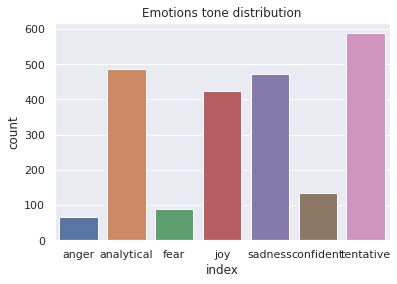

In [64]:
sns.barplot(x = vis_ax1['index'], y = vis_ax1['count'], data=vis_ax1).set_title('Emotions tone distribution')

## Text encoding & Tokenization for BERT

In [65]:
emo_df1.head()

,Unnamed: 0,sentence,label,tones
0,0,i didnt feel humiliated,sadness,"{ ""document_tone"": { ""tones"": [ { ..."
1,1,i can go from feeling so hopeless to so damned...,sadness,"{ ""document_tone"": { ""tones"": [ { ..."
2,2,im grabbing a minute to post i feel greedy wrong,anger,"{ ""document_tone"": { ""tones"": [ { ..."
3,3,i am ever feeling nostalgic about the fireplac...,love,"{ ""document_tone"": { ""tones"": [ { ..."
4,4,i am feeling grouchy,anger,"{ ""document_tone"": { ""tones"": [ { ..."


In [66]:
emo_df1['tones'][7]

'{  "document_tone": {    "tones": [      {        "score": 0.707291,        "tone_id": "sadness",        "tone_name": "Sadness"      },      {        "score": 0.954099,        "tone_id": "tentative",        "tone_name": "Tentative"      }    ]  }}'

In [67]:
missing_values_check = emo_df1.isnull().sum()
print(missing_values_check)

Unnamed: 0    0
sentence      0
label         0
tones         0
dtype: int64


In [68]:
emo_df1 = emo_df1.drop(['label'], axis=1)

In [69]:
emo_df1.head()

,Unnamed: 0,sentence,tones
0,0,i didnt feel humiliated,"{ ""document_tone"": { ""tones"": [ { ..."
1,1,i can go from feeling so hopeless to so damned...,"{ ""document_tone"": { ""tones"": [ { ..."
2,2,im grabbing a minute to post i feel greedy wrong,"{ ""document_tone"": { ""tones"": [ { ..."
3,3,i am ever feeling nostalgic about the fireplac...,"{ ""document_tone"": { ""tones"": [ { ..."
4,4,i am feeling grouchy,"{ ""document_tone"": { ""tones"": [ { ..."


In [70]:
'''
# creating initial dataframe
tone_df1 = emo_df1.copy()
tone_types = ('Anger','Analytical','Fear','Joy','Sadness','Confident','Tentative')
tone_df1 = pd.DataFrame(tone_types, columns=['Bridge_Types'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(tone_df1)
# merge with main df emo_df1 on key values
tone_df1 = tone_df1.join(dum_df)
tone_df1
'''

"\n# creating initial dataframe\ntone_df1 = emo_df1.copy()\ntone_types = ('Anger','Analytical','Fear','Joy','Sadness','Confident','Tentative')\ntone_df1 = pd.DataFrame(tone_types, columns=['Bridge_Types'])\n# generate binary values using get_dummies\ndum_df = pd.get_dummies(tone_df1)\n# merge with main df emo_df1 on key values\ntone_df1 = tone_df1.join(dum_df)\ntone_df1\n"

In [71]:
emo_df2 = emo_df1.copy()
emo_df2.head()

,Unnamed: 0,sentence,tones
0,0,i didnt feel humiliated,"{ ""document_tone"": { ""tones"": [ { ..."
1,1,i can go from feeling so hopeless to so damned...,"{ ""document_tone"": { ""tones"": [ { ..."
2,2,im grabbing a minute to post i feel greedy wrong,"{ ""document_tone"": { ""tones"": [ { ..."
3,3,i am ever feeling nostalgic about the fireplac...,"{ ""document_tone"": { ""tones"": [ { ..."
4,4,i am feeling grouchy,"{ ""document_tone"": { ""tones"": [ { ..."


In [72]:
list_tones = []
c = 0

for json_df1 in emo_df2['tones']:
    fresh_list = [] 
    data_dict_df2 = json.loads(str(json_df1))

    for document_tones_df2 in data_dict_df2['document_tone']['tones']:
      fresh_list.append(document_tones_df2['tone_id'])
      c+=1

    list_tones.append(fresh_list)

emo_df2['tags'] = pd.Series(list_tones)

print(list_tones)
print(c)

[['tentative'], ['sadness', 'tentative'], ['sadness'], ['sadness', 'analytical'], ['anger', 'sadness'], ['sadness', 'tentative'], ['joy', 'tentative'], ['sadness', 'tentative'], ['joy'], ['joy', 'tentative'], ['sadness', 'analytical'], ['tentative'], ['joy', 'analytical'], ['tentative'], ['sadness', 'tentative'], ['fear'], ['analytical', 'tentative'], ['sadness', 'tentative'], ['joy'], [], ['tentative'], ['joy'], [], ['joy'], ['sadness'], ['anger'], ['tentative'], ['sadness', 'fear', 'tentative'], ['tentative'], ['sadness', 'tentative'], ['joy', 'confident'], ['analytical'], ['sadness'], ['anger', 'analytical'], ['sadness', 'analytical'], ['tentative', 'analytical'], [], ['sadness', 'analytical', 'tentative'], ['sadness', 'tentative', 'analytical'], ['sadness', 'tentative', 'analytical'], ['joy', 'tentative'], ['joy'], ['joy'], ['joy'], ['sadness'], ['tentative'], ['sadness'], ['sadness'], [], [], ['joy', 'confident'], ['sadness', 'analytical'], ['tentative'], ['tentative'], ['joy'], [

In [73]:
emo_df2.head()

,Unnamed: 0,sentence,tones,tags
0,0,i didnt feel humiliated,"{ ""document_tone"": { ""tones"": [ { ...",[tentative]
1,1,i can go from feeling so hopeless to so damned...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, tentative]"
2,2,im grabbing a minute to post i feel greedy wrong,"{ ""document_tone"": { ""tones"": [ { ...",[sadness]
3,3,i am ever feeling nostalgic about the fireplac...,"{ ""document_tone"": { ""tones"": [ { ...","[sadness, analytical]"
4,4,i am feeling grouchy,"{ ""document_tone"": { ""tones"": [ { ...","[anger, sadness]"
